# VaR (Value at Risk) :

In [1]:
import os
import pandas as pd
import numpy as np
import pandas as pd

In [2]:
return_data = pd.read_csv('Return.csv')
return_data.dropna()

,Date,Close_Meta,Close_Google,Close_Apple,Close_Microsoft
0,27-Apr-23,-0.140400,-0.023413,-0.020973,-0.010835
1,26-Apr-23,-0.007532,-0.003938,-0.016003,-0.011850
2,25-Apr-23,0.016354,0.032233,0.032736,0.039250
3,24-Apr-23,-0.044096,-0.024481,-0.009105,-0.022010
4,21-Apr-23,-0.000949,-0.010495,-0.009520,0.004848
...,...,...,...,...,...
104,13-Dec-22,0.011820,0.019812,0.022750,0.022558
105,14-Dec-22,0.011820,0.019812,0.022750,0.022558
106,15-Dec-22,0.031820,0.019812,0.022750,0.022558
107,16-Dec-22,0.011820,0.019812,0.022750,0.022558


In [3]:
return_data

,Date,Close_Meta,Close_Google,Close_Apple,Close_Microsoft
0,27-Apr-23,-0.140400,-0.023413,-0.020973,-0.010835
1,26-Apr-23,-0.007532,-0.003938,-0.016003,-0.011850
2,25-Apr-23,0.016354,0.032233,0.032736,0.039250
3,24-Apr-23,-0.044096,-0.024481,-0.009105,-0.022010
4,21-Apr-23,-0.000949,-0.010495,-0.009520,0.004848
...,...,...,...,...,...
104,13-Dec-22,0.011820,0.019812,0.022750,0.022558
105,14-Dec-22,0.011820,0.019812,0.022750,0.022558
106,15-Dec-22,0.031820,0.019812,0.022750,0.022558
107,16-Dec-22,0.011820,0.019812,0.022750,0.022558


In [4]:
# Function to calculate VaR using historical simulation
def calculate_var(returns, alpha=0.05):
    """Calculate Value at Risk (VaR) using historical simulation."""
    returns = np.array(returns)
    var = np.percentile(returns, alpha * 100)
    return var

In [5]:
calculate_var(return_data['Close_Meta'], 0.05)

-0.0401795954

In [ ]:
#using Monte Carlo Simulation

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [7]:
# Function to calculate VaR using Monte Carlo simulation
def calculate_var_mc(returns, alpha=0.05, num_simulations=10000):
    """Calculate Value at Risk (VaR) using Monte Carlo simulation."""
    returns = np.array(returns)
    
    # Calculate daily mean and standard deviation
    mean_daily_return = np.mean(returns)
    std_dev_daily_return = np.std(returns)
    
    # Generate random daily returns for the specified number of simulations
    daily_returns_simulations = np.random.normal(mean_daily_return, std_dev_daily_return, (num_simulations, len(returns)))
    
    # Calculate portfolio returns for each simulation
    portfolio_returns = np.sum(daily_returns_simulations, axis=1)
    
    # Calculate VaR at the specified alpha level
    var = np.percentile(portfolio_returns, alpha * 100)
    
    return var

In [8]:
# Download historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    returns = stock_data['Close'].pct_change().dropna()
    return returns

# Example usage
if __name__ == "__main__":
    # Define parameters
    ticker_symbol = "AAPL"
    start_date = "2020-01-01"
    end_date = "2023-01-01"

    # Get historical stock returns
    stock_returns = get_historical_prices(ticker_symbol, start_date, end_date)
    
stock_returns

C:\Users\HP\AppData\Local\Temp\ipykernel_6696\1186830597.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2020-01-03,-0.009722
2020-01-06,0.007968
2020-01-07,-0.004703
2020-01-08,0.016087
2020-01-09,0.021241
...,...
2022-12-23,-0.002798
2022-12-27,-0.013878
2022-12-28,-0.030685


In [9]:
# Calculate VaR using Monte Carlo simulation
alpha_level = 0.05
var_monte_carlo = calculate_var_mc(stock_returns, alpha=alpha_level)

var_monte_carlo

-0.2901084281985477

In [10]:
#using the previously used data
calculate_var_mc(return_data['Close_Meta'], alpha=alpha_level)

-0.15668613752640287

In [11]:
#parametric way of calculating VaR

In [12]:
# Function to calculate VaR using a parametric approach
def calculate_var_parametric(returns, alpha=0.05):
    """Calculate Value at Risk (VaR) using a parametric approach (normal distribution)."""
    returns = np.array(returns)
    
    # Calculate mean and standard deviation of returns
    mean_return = np.mean(returns)
    std_dev_return = np.std(returns)
    
    # Calculate VaR using the normal distribution quantile
    z_score = np.percentile(returns, 100 * (1 - alpha))
    var = mean_return - z_score * std_dev_return
    
    return var

# Download historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    returns = stock_data['Close'].pct_change().dropna()
    return returns

# Example usage
if __name__ == "__main__":
    # Define parameters
    ticker_symbol = "AAPL"
    start_date = "2020-01-01"
    end_date = "2023-01-01"

    # Get historical stock returns
    stock_returns = get_historical_prices(ticker_symbol, start_date, end_date)

    # Calculate VaR using a parametric approach
    alpha_level = 0.05
    var_parametric = calculate_var_parametric(stock_returns, alpha=alpha_level)

var_parametric

C:\Users\HP\AppData\Local\Temp\ipykernel_6696\2435953531.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


0.00023390918390466182

In [13]:
#VaR of a portfolio

In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm

# Function to calculate portfolio VaR
def calculate_portfolio_var(weights, cov_matrix, alpha=0.05):
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    portfolio_var = norm.ppf(1 - alpha) * portfolio_volatility
    return portfolio_var

# Download historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    returns = stock_data['Close'].pct_change().dropna()
    return returns

# Example usage
if __name__ == "__main__":
    # Define parameters
    ticker_symbols = ["AAPL", "GOOGL", "MSFT"]
    start_date = "2022-01-01"
    end_date = "2023-01-01"
    alpha_level = 0.05

    # Get historical stock returns
    stock_returns = pd.concat([get_historical_prices(ticker, start_date, end_date) for ticker in ticker_symbols], axis=1)
    stock_returns.columns = ticker_symbols

    # Calculate covariance matrix
    cov_matrix = stock_returns.cov()

    # Set initial weights for the assets in the portfolio
    weights = np.array([0.4, 0.4, 0.2])

    # Calculate portfolio VaR
    portfolio_var = calculate_portfolio_var(weights, cov_matrix, alpha=alpha_level)


portfolio_var

C:\Users\HP\AppData\Local\Temp\ipykernel_6696\1810412306.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_6696\1810412306.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_6696\1810412306.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


0.03588691706127219

# Expected Short-fall:

In [16]:
#Expected shortfall
import numpy as np
import pandas as pd
import yfinance as yf

# Function to calculate Expected Shortfall (ES)
def calculate_expected_shortfall(returns, alpha=0.05):
    """Calculate Expected Shortfall (ES) given returns and confidence level."""
    returns = np.array(returns)
    
    # Calculate Value at Risk (VaR) at the specified alpha level
    var = np.percentile(returns, alpha * 100)
    
    # Calculate Expected Shortfall (ES)
    exceedances = returns[returns < var]
    es = np.mean(exceedances)
    
    return es

# Download historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    returns = stock_data['Close'].pct_change().dropna()
    return returns

# Example usage
if __name__ == "__main__":
    # Define parameters
    ticker_symbol = "AAPL"
    start_date = "2022-01-01"
    end_date = "2023-01-01"
    alpha_level = 0.05

    # Get historical stock returns
    stock_returns = get_historical_prices(ticker_symbol, start_date, end_date)

    # Calculate Expected Shortfall
    es = calculate_expected_shortfall(stock_returns, alpha=alpha_level)

    print(f"Expected Shortfall (ES) at {alpha_level * 100}% confidence level: {es:.2%}")

C:\Users\HP\AppData\Local\Temp\ipykernel_6696\1690907963.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Expected Shortfall (ES) at 5.0% confidence level: -4.55%


# Backtesting VaR:

VaR Threshold: -1.525954620915283
Exceedance Ratio: 0.05


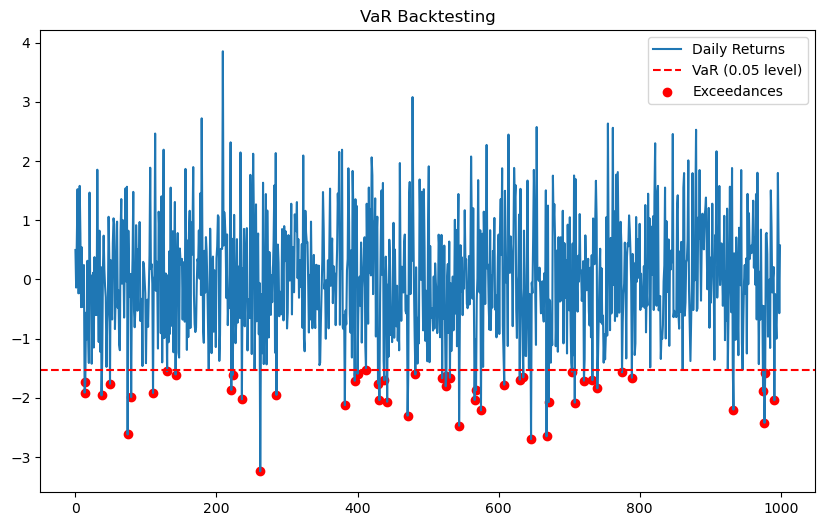

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
np.random.seed(42)
returns = np.random.normal(0, 1, 1000)

# Calculate VaR using a simple method (replace this with your VaR calculation)
alpha = 0.05
var_threshold = np.percentile(returns, 100 * alpha)

# Backtesting
exceedances = returns < var_threshold
exceedance_ratio = exceedances.mean()

# Print results
print(f"VaR Threshold: {var_threshold}")
print(f"Exceedance Ratio: {exceedance_ratio}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(returns, label='Daily Returns')
plt.axhline(var_threshold, color='r', linestyle='--', label=f'VaR ({alpha} level)')
plt.scatter(np.where(exceedances), returns[exceedances], color='red', label='Exceedances')
plt.title('VaR Backtesting')
plt.legend()
plt.show()